# Day 26 Mini Project: Polynomial, Ridge & Lasso Regression

## Objective
Compare Polynomial Regression, Ridge Regression, and Lasso Regression on a sample dataset to understand overfitting and the effects of regularization.


## Dataset
- **Experience** (years) → Feature
- **Salary** ($) → Target
- Number of rows: 10
- Relationship: Non-linear (curve trend)


In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Sample dataset
data = {
    'Experience': [1,2,3,4,5,6,7,8,9,10],
    'Salary': [15000,18000,20000,25000,28000,31000,35000,39000,45000,50000]
}

df = pd.DataFrame(data)
df.head()


,Experience,Salary
0,1,15000
1,2,18000
2,3,20000
3,4,25000
4,5,28000


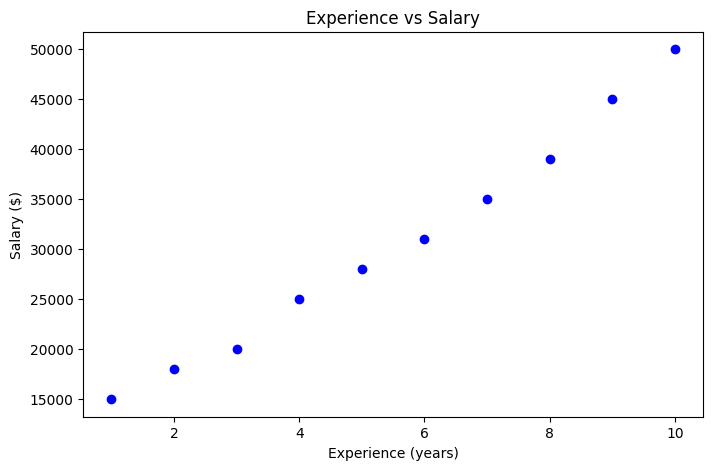

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Experience'], df['Salary'], color='blue')
plt.title('Experience vs Salary')
plt.xlabel('Experience (years)')
plt.ylabel('Salary ($)')
plt.show()


## EDA Observations
- Salary increases non-linearly with experience.
- Curve trend visible → Polynomial regression is suitable.


In [ ]:
# Split features and target
X = df[['Experience']].values
y = df['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Features (degree 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict
y_poly_pred = poly_model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print("Polynomial Regression - MSE:", mse_poly)
print("Polynomial Regression - R²:", r2_poly)


Polynomial Regression - MSE: 260482.5674601973
Polynomial Regression - R²: 0.9985707403705888


In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_ridge_pred = ridge_model.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("Ridge Regression - MSE:", mse_ridge)
print("Ridge Regression - R²:", r2_ridge)


Ridge Regression - MSE: 70798.27868387435
Ridge Regression - R²: 0.9996115320785521


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)
y_lasso_pred = lasso_model.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print("Lasso Regression - MSE:", mse_lasso)
print("Lasso Regression - R²:", r2_lasso)


Lasso Regression - MSE: 240466.4740782271
Lasso Regression - R²: 0.9986805680434665


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+06, tolerance: 8.599e+04
  model = cd_fast.enet_coordinate_descent(


## Model Coefficients Comparison
- Polynomial Regression: normal coefficients
- Ridge Regression: shrinks coefficients
- Lasso Regression: may zero out small coefficients (feature selection)


In [ ]:
print("Polynomial Regression Coefficients:", np.round(poly_model.coef_,2))
print("Ridge Regression Coefficients:", np.round(ridge_model.coef_,2))
print("Lasso Regression Coefficients:", np.round(lasso_model.coef_,2))


Polynomial Regression Coefficients: [   0.   3495.38 -140.89   17.61]
Ridge Regression Coefficients: [   0.   1134.    338.47   -9.94]
Lasso Regression Coefficients: [   0.   3323.22 -104.57   15.46]


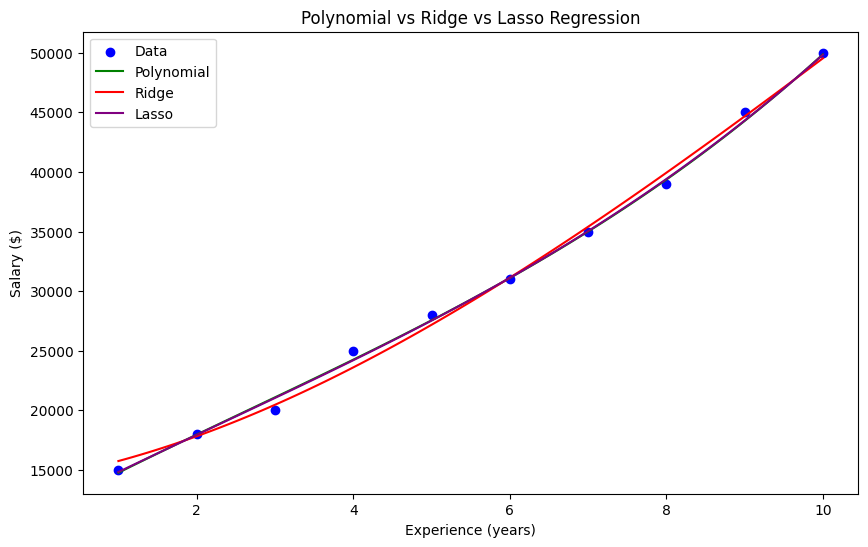

In [ ]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, poly_model.predict(X_range_poly), color='green', label='Polynomial')
plt.plot(X_range, ridge_model.predict(X_range_poly), color='red', label='Ridge')
plt.plot(X_range, lasso_model.predict(X_range_poly), color='purple', label='Lasso')
plt.title('Polynomial vs Ridge vs Lasso Regression')
plt.xlabel('Experience (years)')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()


## Conclusion
- Polynomial Regression fits data best but may overfit in larger datasets.
- Ridge Regression reduces overfitting slightly, suitable for correlated features.
- Lasso Regression can shrink coefficients and perform feature selection.
- Regularization balances bias and variance, improving generalization.
